In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important;} *{font-family:'Consolas'; font-size:14;}</style>"))

[수학기호 읽는 법](https://librewiki.net/wiki/수학_기호)

[컴퓨터 용어](http://terms.co.kr/)

# 분류분석 모형

## 확률적 모형

### 확률적 생성모형

#### 나이브 베이지안 모형
조건부확률 기반 생성 모형은 클래스가 3개 이상인 경우에도 바로 적용할 수 있음

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns
iris = sns.load_dataset("iris")
X = iris.iloc[:, :-1]
y = iris.species

In [4]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X, y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [5]:
test_X = [[5.0, 3.4, 1.2, 0.25]]
model.predict(test_X)

array(['setosa'], dtype='<U10')

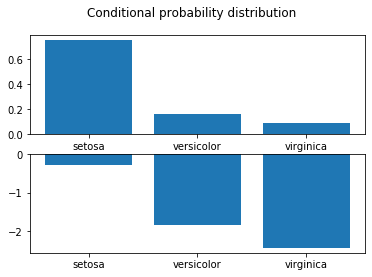

In [6]:
# 나이브 베이지안 모형으로 첫번쨰 데이터가 3개의 카테고리에 속할 확률을 각각 계산해 막대그래프로 표시
# 위쪽 막대그래프는 확률값, 아래쪽 막대그래프는 로그 변환한 값
plt.subplot(211)
plt.bar(model.classes_, model.predict_proba(test_X)[0])
plt.xticks(model.classes_)
plt.subplot(212)
plt.bar(model.classes_, model.predict_log_proba(test_X)[0])
plt.xticks(model.classes_)
plt.suptitle("Conditional probability distribution")
plt.show()

### 확률적 판별 모형

#### 로지스틱 회귀 모형

In [7]:
from sklearn.datasets import make_classification
X, y = make_classification(n_features=1, n_redundant=0,
                           n_informative=1, n_clusters_per_class=1,
                           random_state=1)

In [8]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression().fit(X, y)

In [9]:
import numpy as np
xx = np.linspace(-3, 3, 100)
XX = xx[:, np.newaxis]
prob = log_model.predict_proba(XX)[:, 1]

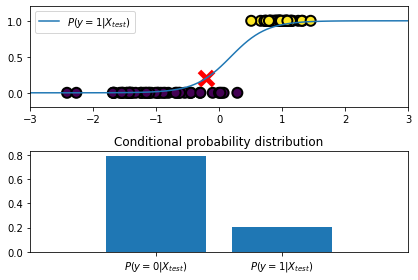

In [10]:
X_test = [[-0.2]]
plt.subplot(211)
plt.plot(xx, prob)
plt.scatter(X, y, marker='o', c=y, s=100, edgecolors='k', linewidth=2)
plt.scatter(X_test[0], log_model.predict_proba(X_test)[0][1:], marker='x', 
            s=200, c='r', lw=5)
plt.xlim(-3, 3)
plt.ylim(-.2, 1.2)
plt.legend(["$P(y=1|X_{test})$"])
plt.subplot(212)
plt.bar(log_model.classes_, log_model.predict_proba(X_test)[0])
plt.xlim(-1, 2)
plt.gca().xaxis.grid(False)
plt.xticks(log_model.classes_, ["$P(y=0|X_{test})$", "$P(y=1|X_{test})$"])
plt.title("Conditional probability distribution")
plt.tight_layout()
plt.show()

#### 의사결정나무 모형 (Decision Tree)

In [24]:
from sklearn.datasets import load_iris
data = load_iris()
X = data.data[:, 2:] # petal_length, petal_width
y = data.target
feature_names = data.feature_names[2:]

In [22]:
feature_names

['petal length (cm)', 'petal width (cm)']

In [26]:
from sklearn.tree import DecisionTreeClassifier

# max_depth가 1이라 모형 평가 결과가 그리 좋지는 않을 것으로 예상됨
dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=0)
dt_model.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [13]:
# 트리모형 시각화
import io
from sklearn.tree import export_graphviz
import pydot
from IPython.core.display import Image

In [17]:
def draw_decision_tree(model, feature_names):
    dot_buf = io.StringIO()
    export_graphviz(model, out_file=dot_buf, feature_names=feature_names)
    graph = pydot.graph_from_dot_data(dot_buf.getvalue())[0]
    image = graph.create_png()
    return Image(image)

In [47]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, model, title):
    resolution = 0.01
    markers = ('s', '^', 'o')
    colors = ('red', 'blue', 'lightgreen')
    cmap = mpl.colors.ListedColormap(colors)
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)
    
    plt.contour(xx1, xx2, Z, cmap=mpl.colors.ListedColormap(['k']))
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8,
                    c=[cmap(idx)], marker=markers[idx], s=80, label=cl)
    
    plt.xlabel(data.feature_names[2])
    plt.ylabel(data.feature_names[3])
    plt.legend(loc='upper left')
    plt.title(title)
    
    return Z

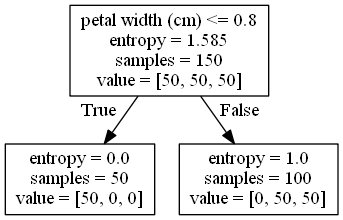

In [29]:
draw_decision_tree(dt_model, feature_names=data.feature_names[2:])

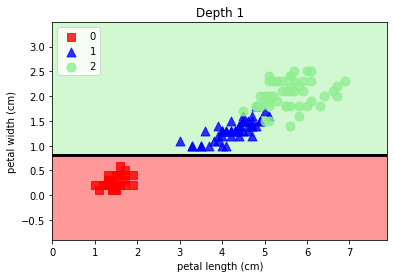

In [48]:
plot_decision_regions(X, y, dt_model, "Depth 1")
plt.show()

In [49]:
# Depth를 조금 더 깊게
dt_model5 = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)
dt_model5.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

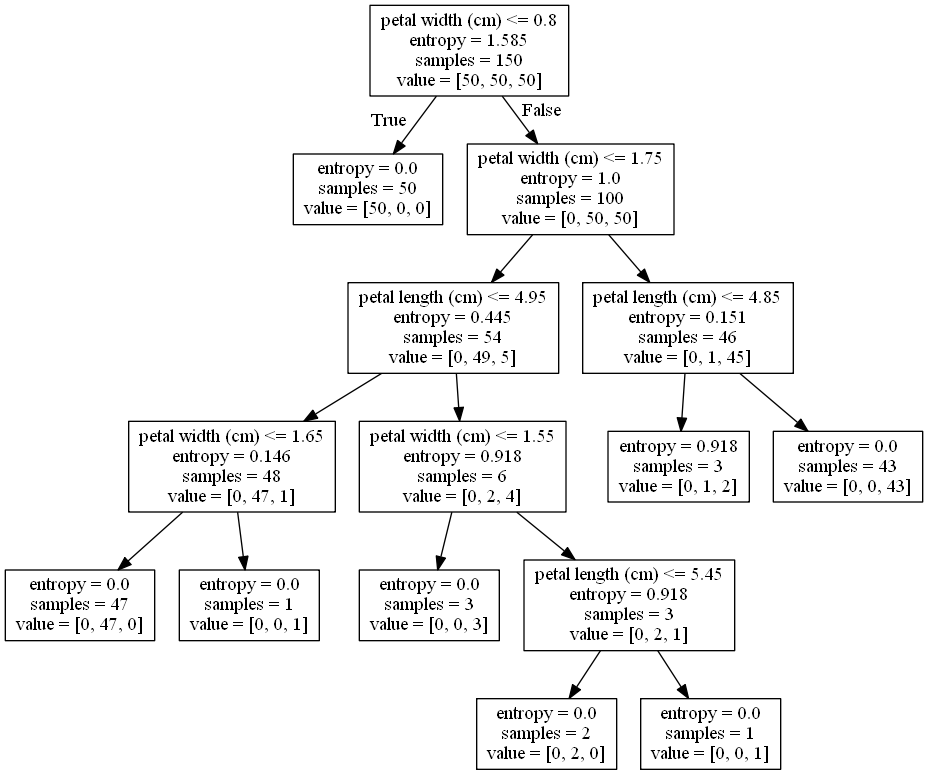

In [50]:
draw_decision_tree(dt_model5, feature_names=data.feature_names[2:])

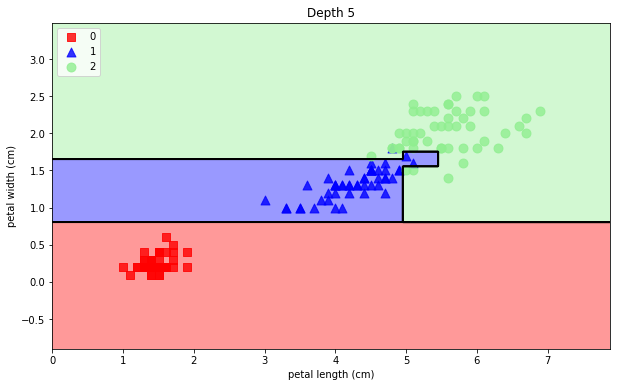

In [51]:
plt.figure(figsize=(10,6))
plot_decision_regions(X, y, dt_model5, "Depth 5")
plt.show()

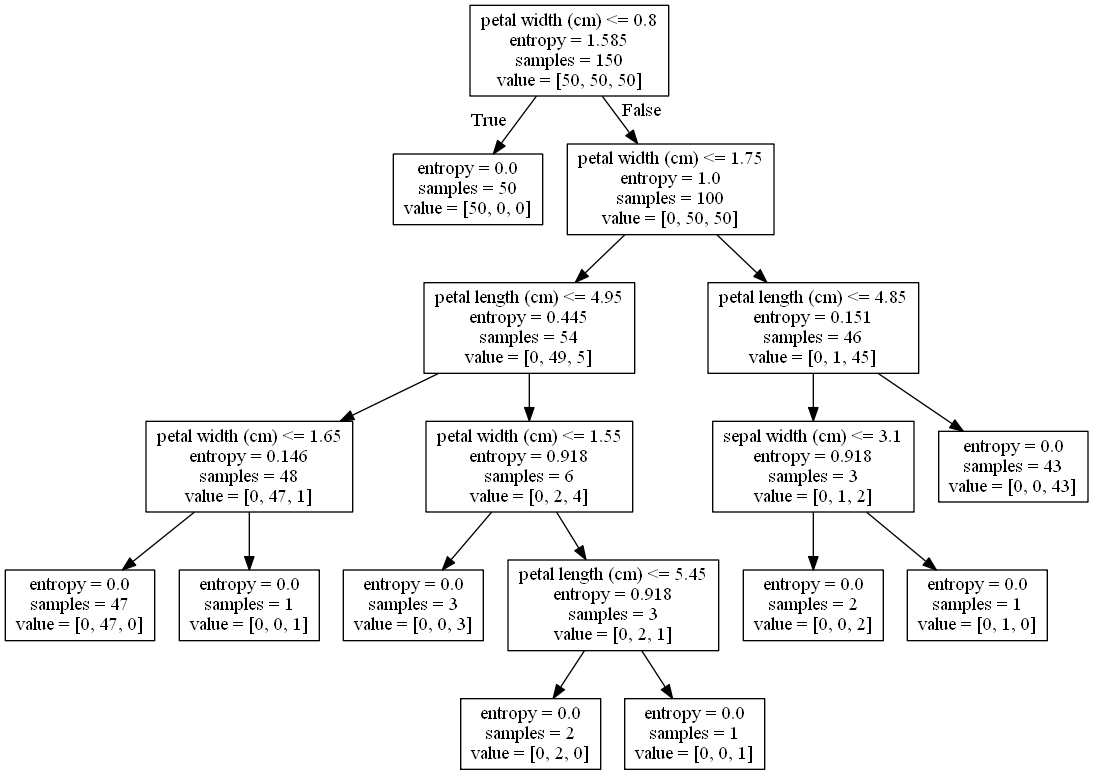

In [52]:
# 모든 변수를 독립변수로 의사결정모형을 학습시키고, 그 모형을 트리로 시각화
data = load_iris()
X = data.data
y = data.target
feature_names = data.feature_names
dt_model6 = DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=0).fit(X, y)

draw_decision_tree(dt_model6, feature_names=data.feature_names)

위 그림에서 samples의 수가 크고 entropy가 작은 노드를 찾고, 그 노드까지 내려오는 상위 노드들의 변수의 값 범위를 통해 분류에 영향을 주는 변수의 값과 범위를 알 수 있음

# 머신러닝 모형 최적화

### 분류모형의 변수 선택

<b> 데이터 불러오기 </b>

In [83]:
import pandas as pd
redwine = pd.read_csv('winequality-red.csv', delimiter=';')

In [84]:
X = redwine.iloc[:, :-1]; y = redwine.iloc[:, -1]
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3)

<b> 상관관계 확인하기 </b>

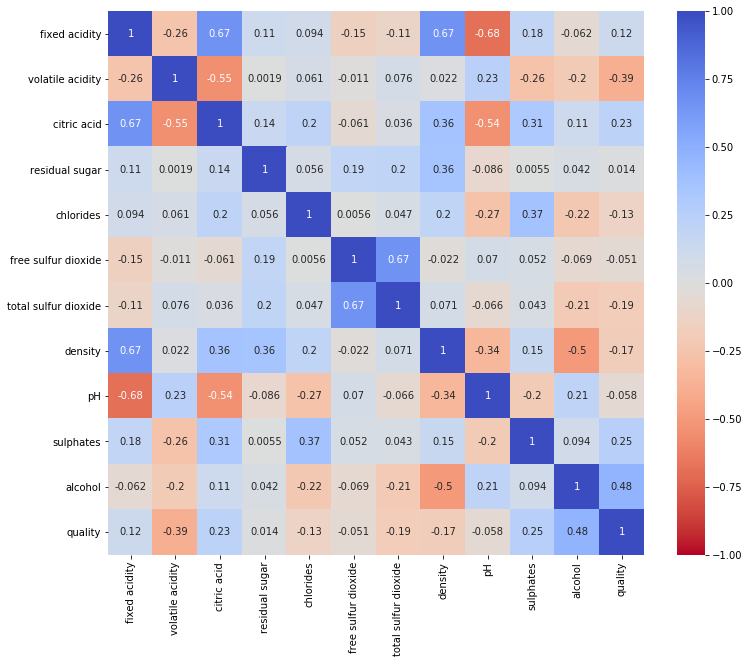

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,10))
sns.heatmap(redwine.corr(), annot=True,
            vmin=-1, vmax=1, cmap='coolwarm_r')
plt.show()

<b> Feature Importance </b>

In [86]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=10, random_state=10)
rf_model.fit(train_X, train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [87]:
rf_model.feature_importances_ # 각 독립변수가 종속변수에 영향을 주는 정도

array([0.07276436, 0.09244728, 0.07410705, 0.07275442, 0.08045681,
       0.07095386, 0.10621663, 0.09122598, 0.08741052, 0.09535926,
       0.15630384])

In [88]:
# feature_importances의 총합은 1
import numpy as np
np.sum(rf_model.feature_importances_)

1.0

In [89]:
# 변수 별 중요도를 갖는 데이터프레임
features = pd.DataFrame(data=np.c_[X.columns, rf_model.feature_importances_],
                        columns=["feature", "importance"])

In [90]:
features.sort_values(by="importance", ascending=False, inplace=True)
features.reset_index(drop=True, inplace=True)

In [91]:
features

,feature,importance
0,alcohol,0.156304
1,total sulfur dioxide,0.106217
2,sulphates,0.0953593
3,volatile acidity,0.0924473
4,density,0.091226
5,pH,0.0874105
6,chlorides,0.0804568
7,citric acid,0.074107
8,fixed acidity,0.0727644
9,residual sugar,0.0727544


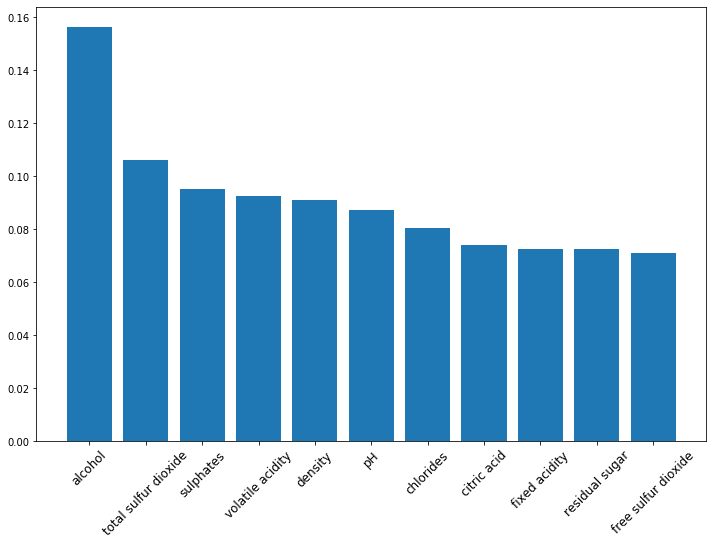

In [92]:
plt.figure(figsize=(12,8))
plt.bar(features.feature, features.importance)
plt.xticks(features.feature, fontsize=12, rotation=45)
plt.show()

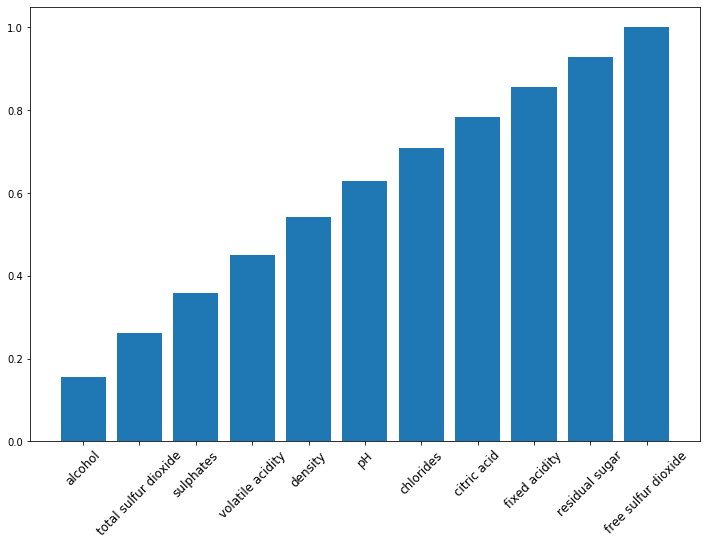

In [93]:
y_stack = np.cumsum(features.importance, axis=0) # 누적합
plt.figure(figsize=(12,8))
plt.bar(features.feature, y_stack)
plt.xticks(features.feature, fontsize=12, rotation=45)
plt.show()

누적합 그래프가 선형성을 보일 경우, 변수의 수를 줄이지 않는 것이 바람직

<b> RFE(Recursive Feature Elimination) </b>

중요도에 따라 중요도가 낮은 변수부터 하나씩 제거해나가면서, 최종적으로 선택하고자 하는 변수의 개수만큼 중요도가 높은 변수를 찾음

In [94]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

In [95]:
rf_model = RandomForestClassifier(n_estimators=10, random_state=10)
rfe_model = RFE(rf_model, n_features_to_select=5) # 첫번째 인수는 estimator(추정기)로, 예측을 위한 모형객체
# n_feature_to_select: 선택할 변수의 수
rfe_model.fit(train_X, train_y)

RFE(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                     class_weight=None, criterion='gini',
                                     max_depth=None, max_features='auto',
                                     max_leaf_nodes=None, max_samples=None,
                                     min_impurity_decrease=0.0,
                                     min_impurity_split=None,
                                     min_samples_leaf=1, min_samples_split=2,
                                     min_weight_fraction_leaf=0.0,
                                     n_estimators=10, n_jobs=None,
                                     oob_score=False, random_state=10,
                                     verbose=0, warm_start=False),
    n_features_to_select=5, step=1, verbose=0)

In [96]:
# 어떤 변수가 선택되었는지 확인
rfe_model.get_support()

array([False,  True, False, False, False, False,  True,  True, False,
        True,  True])

In [97]:
features_rfe = pd.DataFrame(data=np.c_[X.columns.values, rfe_model.get_support()],
                            columns=["feature", "selected"])
features_rfe.sort_values(by="selected", ascending=False)

,feature,selected
1,volatile acidity,True
6,total sulfur dioxide,True
7,density,True
9,sulphates,True
10,alcohol,True
0,fixed acidity,False
2,citric acid,False
3,residual sugar,False
4,chlorides,False
5,free sulfur dioxide,False


In [98]:
features.merge(features_rfe)

,feature,importance,selected
0,alcohol,0.156304,True
1,total sulfur dioxide,0.106217,True
2,sulphates,0.0953593,True
3,volatile acidity,0.0924473,True
4,density,0.091226,True
5,pH,0.0874105,False
6,chlorides,0.0804568,False
7,citric acid,0.074107,False
8,fixed acidity,0.0727644,False
9,residual sugar,0.0727544,False


중요도가 높은 상위 다섯개가 선택되었음을 알 수 있음

### 회귀모형의 변수 선택

<b> 데이터 표준화 </b>

In [99]:
from sklearn.datasets import load_boston
boston = load_boston()
X = boston.data
y = boston.target

In [100]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [103]:
# 회귀모형의 가중치가 동일하게 적용되도록 모든 변수들의 값이 범위가 같아지게 표준화
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

<b> 회귀 계수(Logistic Regression) </b>


In [102]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [105]:
lr.coef_

array([-11.23757803,   4.59294478,   0.78716327,   2.39726409,
        -8.40819845,  18.91411873,   1.84246544, -14.32449027,
         7.0108919 ,  -5.42005319, -10.81007919,   4.46046056,
       -21.93015692])

In [106]:
# 변수 중요도
features = pd.DataFrame(np.c_[boston.feature_names, lr.coef_],
                        columns=['feature', 'coef'])

In [107]:
features.sort_values("coef", ascending=False, inplace=True)
features

,feature,coef
8,RAD,7.010891904584597
1,ZN,4.592944775625027
11,B,4.460460560714119
3,CHAS,2.3972640882229674
5,RM,18.91411873100094
6,AGE,1.8424654421680926
2,INDUS,0.7871632709975273
4,NOX,-8.408198449521924
9,TAX,-5.420053191339735
12,LSTAT,-21.930156919905365


### SelectKBest
가장 높은 score에 따라 k개의 특징을 선택

In [111]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, chi2
X, y = load_iris(return_X_y=True)
X.shape

(150, 4)

In [110]:
X_new = SelectKBest(chi2, k=1).fit_transform(X, y)
X_new.shape

(150, 1)

In [112]:
X_new

array([[1.4],
       [1.4],
       [1.3],
       [1.5],
       [1.4],
       [1.7],
       [1.4],
       [1.5],
       [1.4],
       [1.5],
       [1.5],
       [1.6],
       [1.4],
       [1.1],
       [1.2],
       [1.5],
       [1.3],
       [1.4],
       [1.7],
       [1.5],
       [1.7],
       [1.5],
       [1. ],
       [1.7],
       [1.9],
       [1.6],
       [1.6],
       [1.5],
       [1.4],
       [1.6],
       [1.6],
       [1.5],
       [1.5],
       [1.4],
       [1.5],
       [1.2],
       [1.3],
       [1.4],
       [1.3],
       [1.5],
       [1.3],
       [1.3],
       [1.3],
       [1.6],
       [1.9],
       [1.4],
       [1.6],
       [1.4],
       [1.5],
       [1.4],
       [4.7],
       [4.5],
       [4.9],
       [4. ],
       [4.6],
       [4.5],
       [4.7],
       [3.3],
       [4.6],
       [3.9],
       [3.5],
       [4.2],
       [4. ],
       [4.7],
       [3.6],
       [4.4],
       [4.5],
       [4.1],
       [4.5],
       [3.9],
       [4.8],
      

# 파라미터 탐색과 모형 최적화

<b> validation_curve 

In [113]:
from sklearn.datasets import load_digits
digits = load_digits()
X, y = digits.data, digits.target

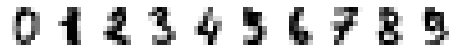

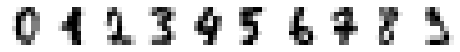

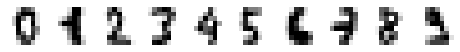

In [114]:
N = 30
nrows = (N//10)

for row in range(nrows):
    plt.figure(figsize=(8, 8))
    for i in range(10):
        plt.subplot(1, 10, i+1)
        plt.imshow(digits.images[i + row*10], cmap=plt.cm.gray_r,
                   interpolation='nearest')
        plt.axis("off")
    plt.show()

In [115]:
from sklearn.svm import SVC
model = SVC().fit(X, y)
model

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [116]:
model.score(X, y)

0.996661101836394

In [117]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, cv=5)

array([0.96111111, 0.94444444, 0.98328691, 0.98885794, 0.93871866])

In [118]:
param_range = np.logspace(-6, -1, 10) #감마 범위(1/10^-6 ~ 1) 지정

In [120]:
%%time
from sklearn.model_selection import validation_curve
train_scores, test_scores = validation_curve(
    SVC(), X, y, param_name="gamma", param_range=param_range,
    cv=10, scoring="accuracy", n_jobs=-1)

Wall time: 9.2 s


In [123]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

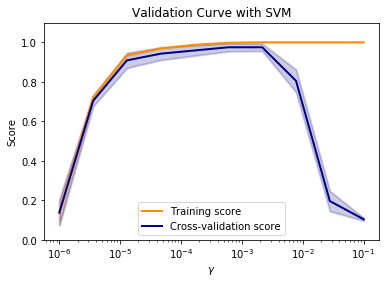

In [124]:
plt.title("Validation Curve with SVM")
plt.xlabel("$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2

plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [125]:
gamma = param_range[test_scores_mean.argmax()]
model = SVC(gamma=gamma).fit(X, y)
model

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0021544346900318843,
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [126]:
model.score(X, y)

1.0

In [127]:
cross_val_score(model, X, y, cv=5)

array([0.95833333, 0.94444444, 0.98050139, 0.99164345, 0.95264624])

<b> GridSearchCV

In [128]:
from __future__ import print_function
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest

iris = load_iris()
X, y = iris.data, iris.target

In [129]:
pca = PCA(n_components=2)
selection = SelectKBest(k=1)
combined_features = FeatureUnion([("pca", pca), ("univ_select", selection)])

# 결합한 특징들을 transform() 데이터셋으로 사용
X_features = combined_features.fit(X, y).transform(X)
# print("Combined space has", X_features.shape[1], "features")
svm = SVC(kernel="linear")

In [130]:
pipeline = Pipeline([("features", combined_features), ("svm", svm)])
param_grid = dict(features__pca__n_components=[1,2,3],
                  features__univ_select__k=[1,2],
                  svm__C=[0.1,1,10])

grid_search = GridSearchCV(pipeline, param_grid=param_grid,
                           cv=5, verbose=10)
grid_search.fit(X, y)
print(grid_search.best_estimator_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] features__pca__n_components=1, features__univ_select__k=1, svm__C=0.1 
[CV]  features__pca__n_components=1, features__univ_select__k=1, svm__C=0.1, score=0.933, total=   0.1s
[CV] features__pca__n_components=1, features__univ_select__k=1, svm__C=0.1 
[CV]  features__pca__n_components=1, features__univ_select__k=1, svm__C=0.1, score=0.933, total=   0.0s
[CV] features__pca__n_components=1, features__univ_select__k=1, svm__C=0.1 
[CV]  features__pca__n_components=1, features__univ_select__k=1, svm__C=0.1, score=0.867, total=   0.0s
[CV] features__pca__n_components=1, features__univ_select__k=1, svm__C=0.1 
[CV]  features__pca__n_components=1, features__univ_select__k=1, svm__C=0.1, score=0.933, total=   0.0s
[CV] features__pca__n_components=1, features__univ_select__k=1, svm__C=0.1 
[CV]  features__pca__n_components=1, features__univ_select__k=1, svm__C=0.1, score=1.000, total=   0.0s
[CV] features__pca__n_components=1, fea

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s



[CV] features__pca__n_components=1, features__univ_select__k=1, svm__C=10 
[CV]  features__pca__n_components=1, features__univ_select__k=1, svm__C=10, score=1.000, total=   0.0s
[CV] features__pca__n_components=1, features__univ_select__k=2, svm__C=0.1 
[CV]  features__pca__n_components=1, features__univ_select__k=2, svm__C=0.1, score=0.933, total=   0.0s
[CV] features__pca__n_components=1, features__univ_select__k=2, svm__C=0.1 
[CV]  features__pca__n_components=1, features__univ_select__k=2, svm__C=0.1, score=0.967, total=   0.0s
[CV] features__pca__n_components=1, features__univ_select__k=2, svm__C=0.1 
[CV]  features__pca__n_components=1, features__univ_select__k=2, svm__C=0.1, score=0.933, total=   0.0s
[CV] features__pca__n_components=1, features__univ_select__k=2, svm__C=0.1 
[CV]  features__pca__n_components=1, features__univ_select__k=2, svm__C=0.1, score=0.933, total=   0.0s
[CV] features__pca__n_components=1, features__univ_select__k=2, svm__C=0.1 
[CV]  features__pca__n_co

         verbose=False)


[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    0.5s finished


In [131]:
model = grid_search.best_estimator_

In [132]:
pred = model.predict(X)

In [133]:
ct = pd.crosstab(y, pred, rownames=['True'], colnames=['Pred'], margins=True)
print(ct)

Pred   0   1   2  All
True                 
0     50   0   0   50
1      0  46   4   50
2      0   0  50   50
All   50  46  54  150
